# Capstone Project - Team 11

## Capstone assignment

[Link to capstnone project assignment - Pyladies Ams](https://github.com/pyladiesams/Bootcamp-Data-Analysis-beginner-apr-may2020/tree/master/Capstone)

##### Libraries

- Pandas
- Matplotlib
- Seaborn (optional)
- NumPy (optional)

##### Capstone Task


1. Find a dataset that has at least 2 CSV files (to merge/join/concat them later)
2. Come up with 5 questions that you want to answer while exploring the dataset
3. Create one GitHub repository for your team Capstone project
4. Perform EDA (Exploratoty Data Analysis) on your dataset with basic visualisations
5. Make a 5 min presentation about your team findings and be ready to present it online. Add presentation slides to your GitHub repo.
6. Celebrate and wait for your certificate (send your name and surname for the certificate in a direct message on Slack to Alyona Galyeva)


## Data preprocessing

Go directly to a [summary](#Summary) of preprocessing to copy the commands used.

In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data1 = pd.read_csv('Mobile_App_Store_Data/appleStore.csv')
data2 = pd.read_csv('Mobile_App_Store_Data/appleStore_description.csv')

# merge data
data = pd.merge(data1, data2, how='outer', on=['id', 'id'])

# clean
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('track_name_y', axis=1)
data = data.drop('size_bytes_y', axis=1)

# show
data.head(10)

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\r..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...
5,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,"★ WINNER ""BEST GAME"" 2009\r\n★ 3rd PLACE WINNE..."
6,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1,Description\r\nTAP INTO YOUR MONEY\r\nSend mon...
7,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,Find the music you love and let the music you ...
8,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,"PCalc is the powerful choice for scientists, e..."
9,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,Now with MFi controller support!\r\n\r\nMs. PA...


# QUESTION 4

Which genres get the most user feedback, which the least?

In [2]:
#grouping and organizing (descending) variables "prime_genre" and "rating_count_tot"
data.groupby(["prime_genre"])["rating_count_tot"].sum().sort_values(ascending=False)

prime_genre
Games                52878491
Social Networking     7598316
Photo & Video         5008946
Entertainment         4030518
Music                 3980199
Shopping              2271070
Health & Fitness      1784371
Utilities             1702228
Sports                1599070
Weather               1597034
Reference             1434294
Productivity          1433136
Finance               1148956
Travel                1144485
Education             1014371
News                   976130
Lifestyle              887294
Food & Drink           878133
Book                   574049
Navigation             545282
Business               272921
Catalogs                17325
Medical                 13634
Name: rating_count_tot, dtype: int64

As we can see the genre with the most user feedback is **"Games"** and the genre with the least user feedback is **"Medical"** 

In [3]:
#Ploting for better viewing 
Genre_rating = data.groupby(["prime_genre"])["rating_count_tot"].sum().sort_values(ascending=False)

[]

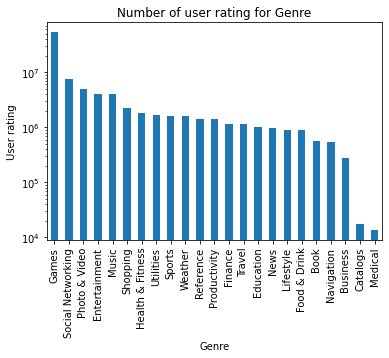

In [52]:
Genre_rating_plot = Genre_rating.plot.bar()
plt.title("Number of user rating for Genre")
plt.xlabel("Genre")
plt.ylabel ("User rating")
plt.yscale("log")
Genre_rating_plot.plot()
#change the scale

**Note:** it is important to point out that "Games" is by far the type of genre with the most  user feedback.

# QUESTION 7

How many apps are there per genre? what percentage do they represent?

In [5]:
# How many apps are there per genre?
data.groupby(["prime_genre"])["track_name_x"].count().sort_values(ascending=False)

prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: track_name_x, dtype: int64

Text(0, 0.5, 'User rating')

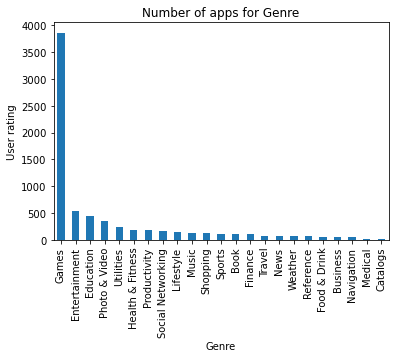

In [55]:
Number_apps_genre=data.groupby(["prime_genre"])["track_name_x"].count().sort_values(ascending=False)
Number_apps_genre=Number_apps_genre.plot.bar()
plt.title("Number of apps for Genre")
plt.xlabel("Genre")
plt.ylabel ("User rating")

In [30]:
#what percentage do they represent?
Total_app_Genre=data.groupby("prime_genre").agg(total_apps = ("track_name_x","count"))
Percent_per_genre=Total_app_Genre.apply(lambda x: round(100*x/float(x.sum()),2)).sort_values(by="total_apps", ascending=False)
Percent_per_genre

,total_apps
prime_genre,
Games,53.66
Entertainment,7.43
Education,6.29
Photo & Video,4.85
Utilities,3.45
Health & Fitness,2.50
Productivity,2.47
Social Networking,2.32
Lifestyle,2.00


In [54]:
#plotting the top 5 genre with the highest number of apps

#defining the top 5 dataframe and the "others"
top_5_df=Percent_per_genre[:5].copy()
others = pd.DataFrame(data={"prime_genre":["other"], "total_apps": Percent_per_genre["total_apps"][5:].sum()}).set_index("prime_genre")


In [32]:
others

,total_apps
prime_genre,
other,24.33


In [33]:
#combining top_5_df with others
New_percent_per_genre=pd.concat([top_5_df, others])
New_percent_per_genre

,total_apps
prime_genre,
Games,53.66
Entertainment,7.43
Education,6.29
Photo & Video,4.85
Utilities,3.45
other,24.33


[]

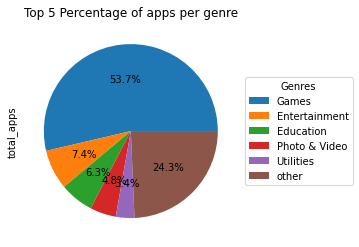

In [62]:
p2 = New_percent_per_genre.plot(kind="pie", y="total_apps", autopct='%1.1f%%', title="Top 5 Percentage of apps per genre", labels=None)

p2.legend(labels=New_percent_per_genre.index, title="Genres", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
p2.plot()

**Conclusion** more than half of the apps in the dataset belong to the "Game" cathegory. The other top 5 genres have a much lower percentage of participation.